# Chuẩn bị dữ liệu

In [133]:
import pyodbc
import pandas as pd
import numpy as np

Kết nối với sever

In [134]:
server_name = 'DESKTOP-P1EP8UL'
database_name = 'AdventureWorksDW2012'

connection = pyodbc.connect('Driver={SQL Server}; Server=' + server_name +
                      '; Database=' + database_name +
                      '; Trusted_Connection=yes;')



Lấy dữ liệu những khách hàng và thông tin liệu khách hàng đó có mua xe đạp hay không

In [135]:
df = pd.read_sql_query(
    "select c.Gender as gender, \
        c.YearlyIncome as yearly_income, \
        c.MaritalStatus as marital_status, \
        c.TotalChildren as total_children, \
        c.NumberChildrenAtHome as children_at_home, \
        c.HouseOwnerFlag as house_owner, \
        c.NumberCarsOwned as cars_owned, \
        c.EnglishOccupation as occupation, \
        c.EnglishEducation as education,\
        c.CommuteDistance as commute_distance, \
        2012-year(c.BirthDate) as birthdate\
        , case sum(case pc.EnglishProductCategoryName when 'Bikes' then 1 else 0 end) \
          when 0 then 0 else 1 end as bikes \
    from FactInternetSales f \
        join DimCustomer c on f.CustomerKey = c.CustomerKey \
        join DimProduct p on f.ProductKey = p.ProductKey \
        join DimProductSubcategory psc on p.ProductSubcategoryKey = psc.ProductSubcategoryKey \
        join DimProductCategory pc on psc.ProductCategoryKey = pc.ProductCategoryKey \
    group by c.Gender, c.YearlyIncome, c.MaritalStatus, c.TotalChildren, c.NumberChildrenAtHome, c.HouseOwnerFlag, \
        c.NumberCarsOwned, c.EnglishOccupation, c.EnglishEducation, c.CommuteDistance, 2012-year(c.BirthDate)",
    connection) 

df.head()

,gender,yearly_income,marital_status,total_children,children_at_home,house_owner,cars_owned,occupation,education,commute_distance,birthdate,bikes
0,F,30000.0,M,0,0,1,0,Clerical,Bachelors,0-1 Miles,47,1
1,M,30000.0,M,2,0,0,2,Clerical,Partial College,1-2 Miles,59,1
2,F,20000.0,S,0,0,0,1,Manual,High School,5-10 Miles,31,0
3,F,20000.0,S,1,1,0,1,Manual,Partial College,1-2 Miles,34,0
4,M,50000.0,S,2,2,1,1,Skilled Manual,Bachelors,2-5 Miles,29,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10687 entries, 0 to 10686
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10687 non-null  object 
 1   yearly_income     10687 non-null  float64
 2   marital_status    10687 non-null  object 
 3   total_children    10687 non-null  int64  
 4   children_at_home  10687 non-null  int64  
 5   house_owner       10687 non-null  object 
 6   cars_owned        10687 non-null  int64  
 7   occupation        10687 non-null  object 
 8   education         10687 non-null  object 
 9   commute_distance  10687 non-null  object 
 10  birthdate         10687 non-null  int64  
 11  bikes             10687 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1002.0+ KB


Ta thu được bộ dữ liệu có 4693 dòng

In [137]:
df.isnull().sum()

gender              0
yearly_income       0
marital_status      0
total_children      0
children_at_home    0
house_owner         0
cars_owned          0
occupation          0
education           0
commute_distance    0
birthdate           0
bikes               0
dtype: int64

Dataframe không có dữ liệu null

# Thống kê mô tả

In [138]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,10687,2,M,5436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearly_income,10687.0,NaN,NaN,NaN,62754.74876,35719.523416,10000.0,30000.0,60000.0,80000.0,170000.0
marital_status,10687,2,M,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_children,10687.0,NaN,NaN,NaN,2.108917,1.629529,0.0,1.0,2.0,3.0,5.0
children_at_home,10687.0,NaN,NaN,NaN,1.229157,1.632471,0.0,0.0,0.0,2.0,5.0
house_owner,10687,2,1,7004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cars_owned,10687.0,NaN,NaN,NaN,1.641995,1.201108,0.0,1.0,2.0,2.0,4.0
occupation,10687,5,Professional,3467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,10687,5,Bachelors,3147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commute_distance,10687,5,0-1 Miles,3601,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Thống kê các giá trị dữ liệu trên các cột loại object

In [139]:
for col in df.select_dtypes(include=object).columns:
    print(f"Column '{col}' data: ")
    print(df[col].value_counts())
    print("=========================")

Column 'gender' data: 
M    5436
F    5251
Name: gender, dtype: int64
Column 'marital_status' data: 
M    5825
S    4862
Name: marital_status, dtype: int64
Column 'house_owner' data: 
1    7004
0    3683
Name: house_owner, dtype: int64
Column 'occupation' data: 
Professional      3467
Management        2250
Skilled Manual    2234
Clerical          1444
Manual            1292
Name: occupation, dtype: int64
Column 'education' data: 
Bachelors              3147
Partial College        2859
High School            1903
Graduate Degree        1867
Partial High School     911
Name: education, dtype: int64
Column 'commute_distance' data: 
0-1 Miles     3601
1-2 Miles     1836
2-5 Miles     1833
5-10 Miles    1815
10+ Miles     1602
Name: commute_distance, dtype: int64


Thống kê các giá trị dữ liệu các cột như total_children, children_at_home, car_owned và bikes

In [140]:
col_list = ['total_children', 'children_at_home', 'cars_owned', 'bikes', 'birthdate']
for col in col_list:
    print(f"Column '" + col + "' data: ")
    print(df[col].value_counts())
    print("=================================")

Column 'total_children' data: 
0    2373
2    2366
1    1853
4    1610
3    1456
5    1029
Name: total_children, dtype: int64
Column 'children_at_home' data: 
0    5684
1    1531
2    1053
3     885
4     826
5     708
Name: children_at_home, dtype: int64
Column 'cars_owned' data: 
2    3714
1    2529
0    2253
3    1173
4    1018
Name: cars_owned, dtype: int64
Column 'bikes' data: 
1    5762
0    4925
Name: bikes, dtype: int64
Column 'birthdate' data: 
37    388
41    388
33    381
36    366
39    361
     ... 
94      2
87      2
88      2
92      1
96      1
Name: birthdate, Length: 70, dtype: int64


# Trực quan hóa dữ liệu

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

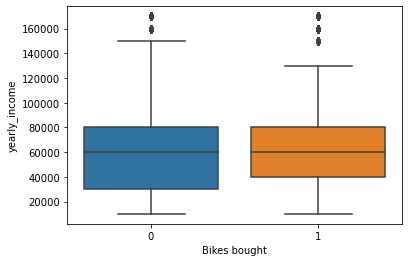

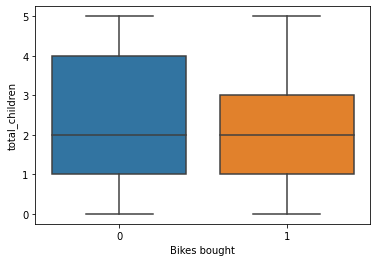

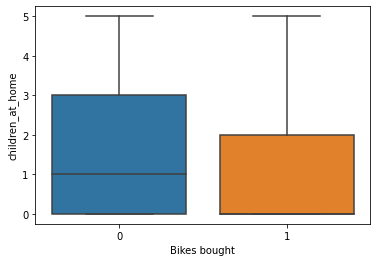

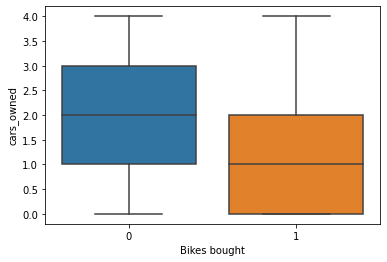

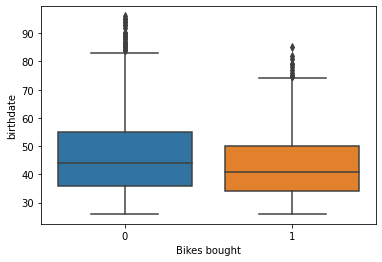

In [142]:
for col in df[['yearly_income', 'total_children', 'children_at_home', 'cars_owned', 'birthdate']]:
    sns.boxplot('bikes', col, data=df)
    plt.xlabel('Bikes bought')
    plt.ylabel(col)
    plt.show()

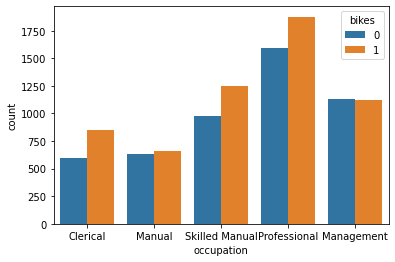

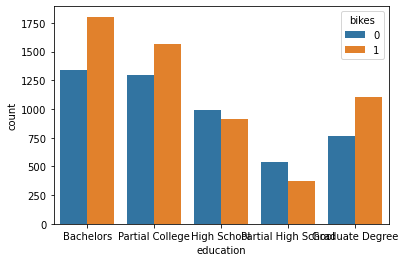

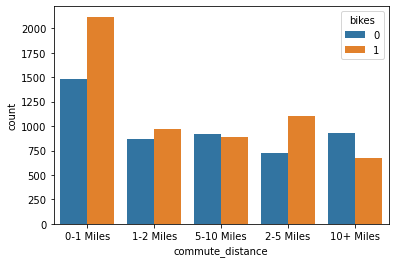

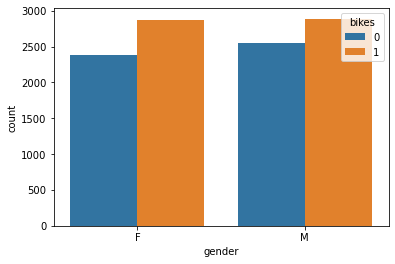

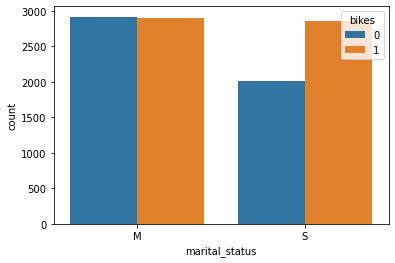

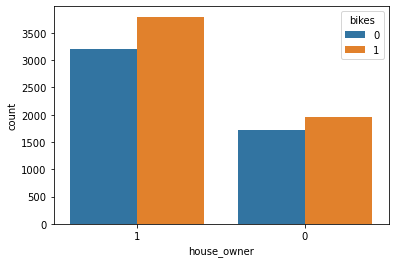

In [143]:
for col in ['occupation', 'education', 'commute_distance', 'gender', 'marital_status', 'house_owner']:
    ax = sns.countplot(x=col, hue='bikes', data=df)
    plt.show()

In [144]:
dummies = pd.get_dummies(df[['gender', 'marital_status','occupation','education','commute_distance']])
df_test = pd.concat([df.drop(columns=['gender', 'marital_status','occupation','education','commute_distance']), dummies], axis=1)
df_test

,yearly_income,total_children,children_at_home,house_owner,cars_owned,birthdate,bikes,gender_F,gender_M,marital_status_M,...,education_Bachelors,education_Graduate Degree,education_High School,education_Partial College,education_Partial High School,commute_distance_0-1 Miles,commute_distance_1-2 Miles,commute_distance_10+ Miles,commute_distance_2-5 Miles,commute_distance_5-10 Miles
0,30000.0,0,0,1,0,47,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,30000.0,2,0,0,2,59,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,20000.0,0,0,0,1,31,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,20000.0,1,1,0,1,34,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,50000.0,2,2,1,1,29,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,80000.0,4,3,0,2,43,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
10683,10000.0,3,0,1,1,65,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
10684,40000.0,5,0,1,4,61,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
10685,70000.0,2,0,1,2,50,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1


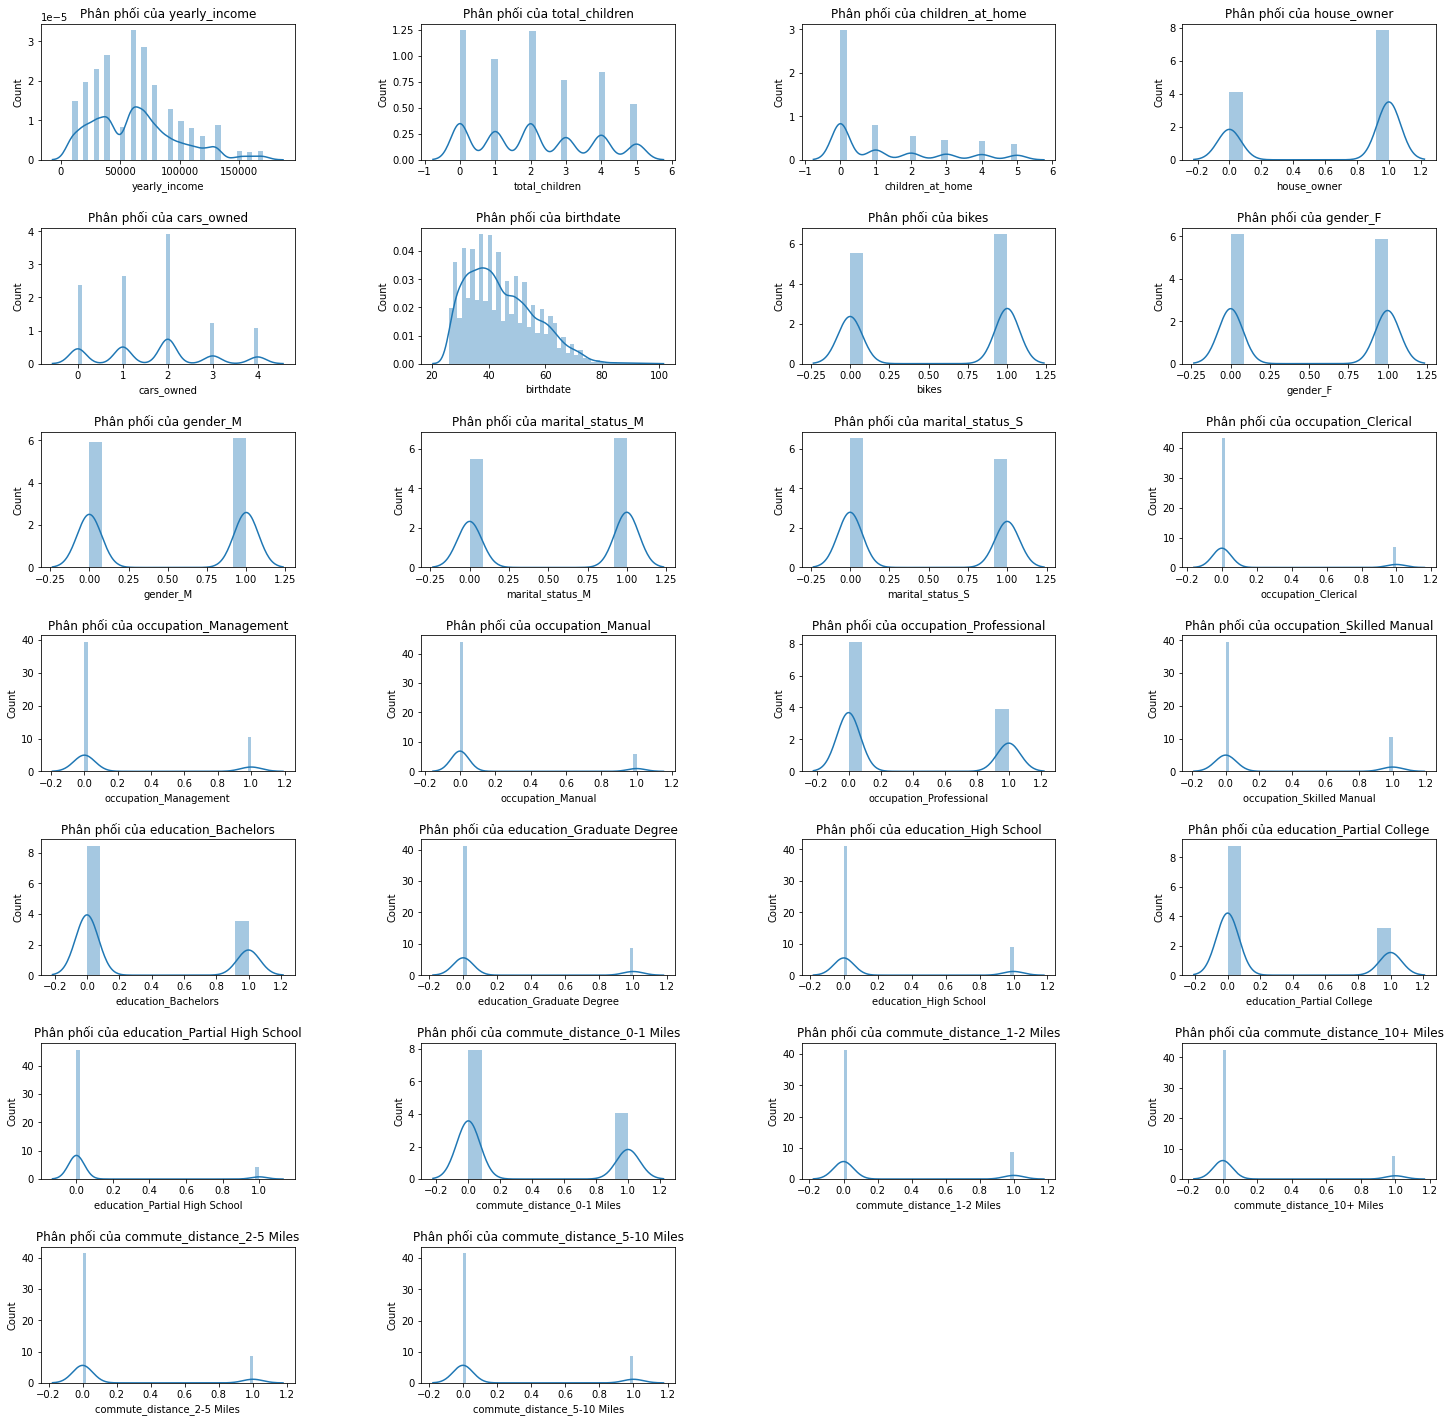

In [145]:
f, ax = plt.subplots(figsize=(25,25))
cols = len(df_test.columns)
for index, col in enumerate(df_test.columns):
  plt.subplot(cols/4 + 1, 4, index+1)
  sns.distplot(df_test[col].dropna())
  plt.title(f"Phân phối của {col}")
  plt.xlabel(col)
  plt.ylabel('Count')

plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

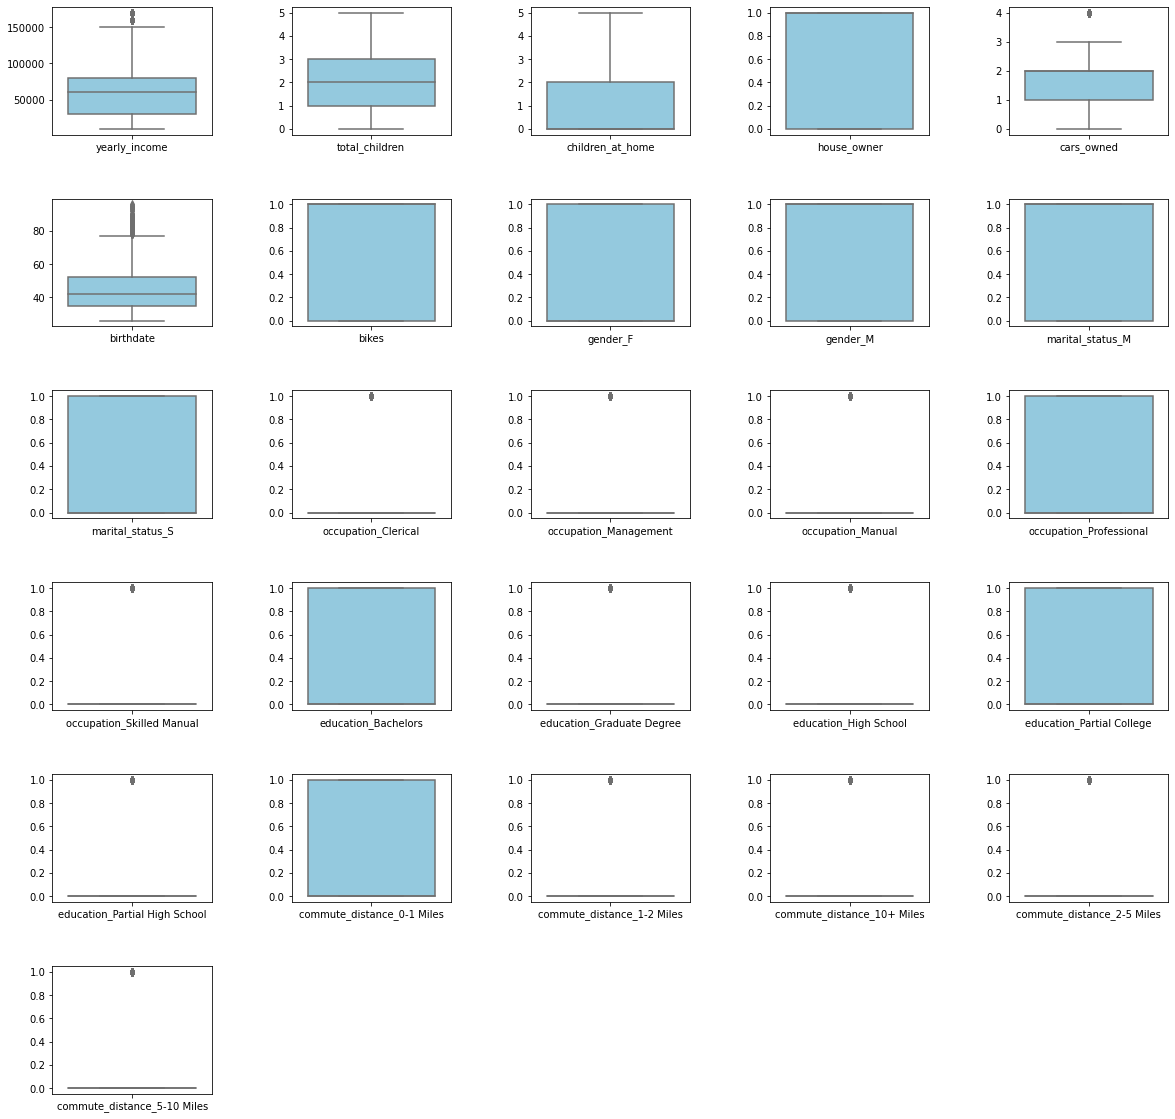

In [146]:
fig, axs = plt.subplots(figsize=(20, 20))
for index, col in enumerate(df_test.columns):
  plt.subplot(cols/5 + 1, 5, index+1)
  sns.boxplot(data=df_test, order=[col], color="skyblue", orient='v')
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

<AxesSubplot:>

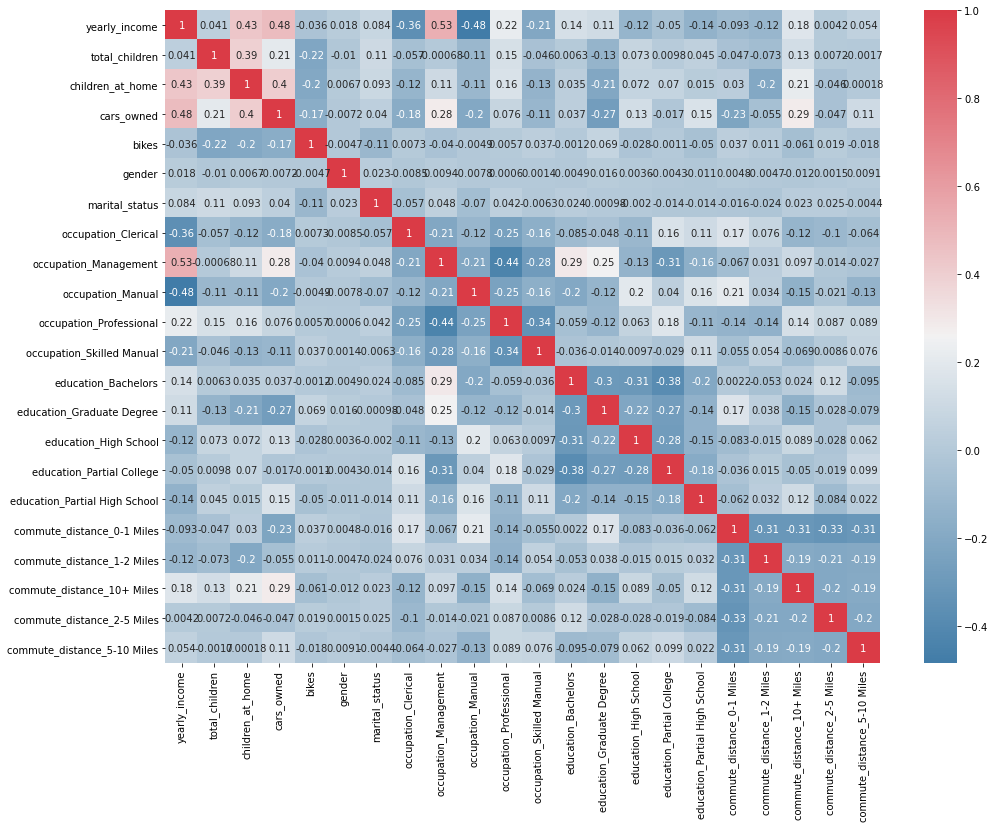

In [56]:
# Sự tương quan giữa các cột dữ liệu
## Ma trận tương quan:
corr = df_test.corr()
f, ax = plt.subplots(figsize=(16, 12))
## diverging_palette: khai báo màu tương ứng với mức độ tương quan
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
## heatmap: biểu đồ nhiệt biểu diễn sự tương quan giữa các cột trong tệp dữ liệu
sns.heatmap(corr, annot=True, cmap=cmap)

# Gom cụm

Lấy 2 cột yearly_income, total_children và cars_owned 

In [147]:
X = df.iloc[:,[1, 10, 3]]
X

,yearly_income,birthdate,total_children
0,30000.0,47,0
1,30000.0,59,2
2,20000.0,31,0
3,20000.0,34,1
4,50000.0,29,2
...,...,...,...
10682,80000.0,43,4
10683,10000.0,65,3
10684,40000.0,61,5
10685,70000.0,50,2


Tìm số cụm tối ưu theo phương pháp Elbow

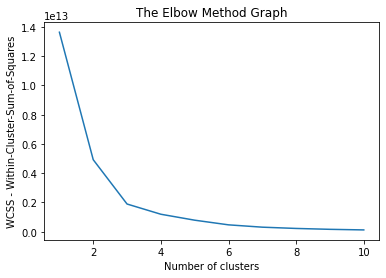

In [148]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS - Within-Cluster-Sum-of-Squares')
plt.show()

Số cụm tối ưu theo phương pháp Elbow là 3
Do đó ta phân cụm dữ liệu với số cụm là 3

Phân cụm dữ liệu, và tìm được tâm cụm

In [149]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X.values)
centroids = kmeans.cluster_centers_

In [150]:
y_kmeans

array([2, 2, 2, ..., 2, 0, 2])

In [151]:
X['ClusterIndex'] = y_kmeans
X

,yearly_income,birthdate,total_children,ClusterIndex
0,30000.0,47,0,2
1,30000.0,59,2,2
2,20000.0,31,0,2
3,20000.0,34,1,2
4,50000.0,29,2,0
...,...,...,...,...
10682,80000.0,43,4,0
10683,10000.0,65,3,2
10684,40000.0,61,5,2
10685,70000.0,50,2,0


Biểu đồ phân cụm và các tâm của cụm

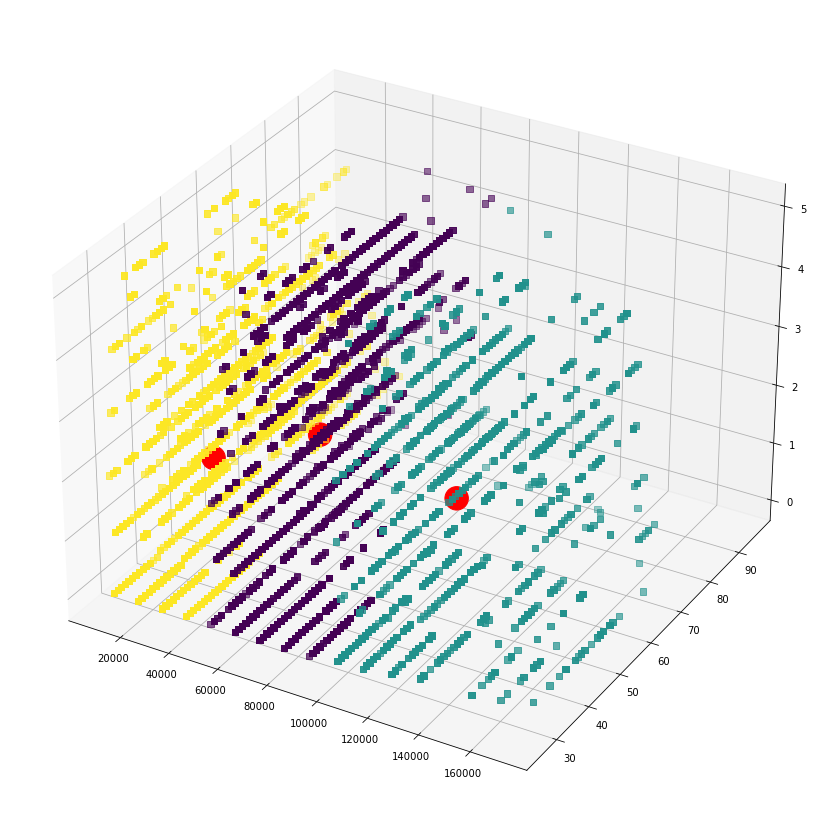

In [152]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
x = np.array(X['yearly_income'])
y = np.array(X['birthdate'])
z = np.array(X['total_children'])

ax.scatter(x,y,z, marker="s", c=X["ClusterIndex"], s=40)
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c="red",s=550,label="Centers",alpha=1)
plt.show()

In [153]:
print("Centroids are:", centroids)

Centroids are: [[6.95228216e+04 4.45869295e+01 2.51161826e+00]
 [1.21815733e+05 4.60765086e+01 2.02693966e+00]
 [2.72924458e+04 4.33076540e+01 1.66292695e+00]]


# Mô tả từng cụm

In [154]:
X[X['ClusterIndex']==0].describe()

,yearly_income,birthdate,total_children,ClusterIndex
count,4820.000000,4820.000000,4820.000000,4820.0
mean,69522.821577,44.586929,2.511618,0.0
std,11564.685761,11.260342,1.732970,0.0
min,50000.000000,26.000000,0.000000,0.0
25%,60000.000000,36.000000,1.000000,0.0
50%,70000.000000,43.000000,2.000000,0.0
75%,80000.000000,52.000000,4.000000,0.0
max,90000.000000,84.000000,5.000000,0.0


In [155]:
X[X['ClusterIndex']==1].describe()

,yearly_income,birthdate,total_children,ClusterIndex
count,1856.000000,1856.000000,1856.00000,1856.0
mean,121815.732759,46.076509,2.02694,1.0
std,20450.202229,10.513119,1.52864,0.0
min,100000.000000,26.000000,0.00000,1.0
25%,110000.000000,38.000000,1.00000,1.0
50%,120000.000000,45.000000,2.00000,1.0
75%,130000.000000,53.000000,3.00000,1.0
max,170000.000000,85.000000,5.00000,1.0


In [156]:
X[X['ClusterIndex']==2].describe()

,yearly_income,birthdate,total_children,ClusterIndex
count,4011.000000,4011.000000,4011.000000,4011.0
mean,27292.445774,43.307654,1.662927,2.0
std,10881.313469,13.172161,1.410353,0.0
min,10000.000000,26.000000,0.000000,2.0
25%,20000.000000,32.000000,0.000000,2.0
50%,30000.000000,40.000000,2.000000,2.0
75%,40000.000000,52.000000,3.000000,2.0
max,40000.000000,96.000000,5.000000,2.0
